# SALES PREDICTION USING PYTHON:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import kaggle
import zipfile36 as zipfile
import warnings
warnings.filterwarnings('ignore')

In [2]:
!kaggle datasets download -d bumba5341/advertisingcsv

advertisingcsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
zipfile_name = 'advertisingcsv.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
df.shape

(200, 5)

In [11]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [12]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: >

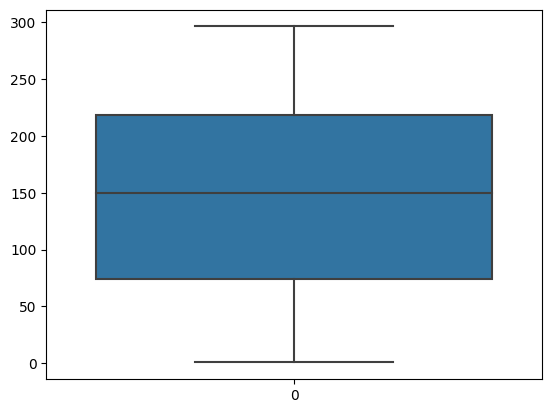

In [13]:
sns.boxplot(df['TV'])

<Axes: >

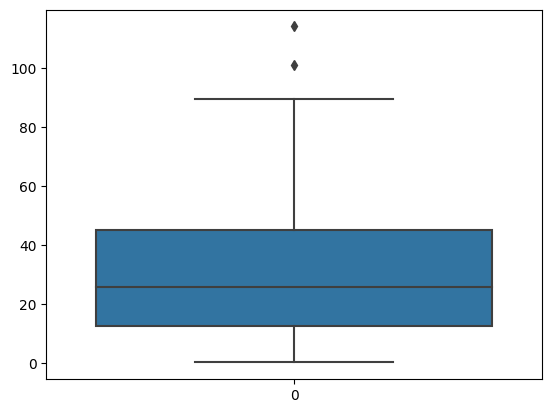

In [14]:
sns.boxplot(df['Newspaper'])

<Axes: >

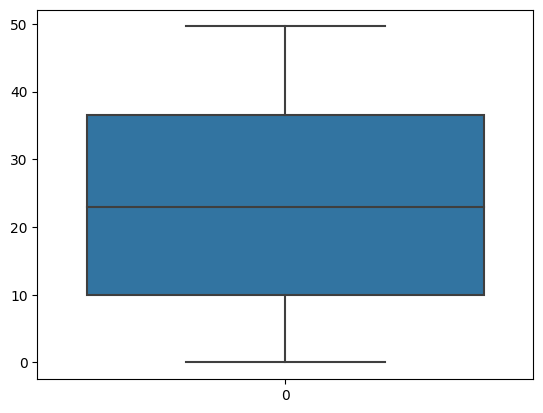

In [15]:
sns.boxplot(df['Radio'])

<Axes: xlabel='Newspaper', ylabel='Density'>

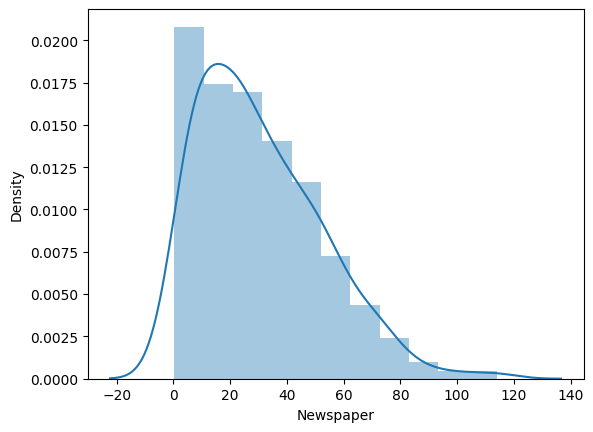

In [16]:
sns.distplot(df['Newspaper'])

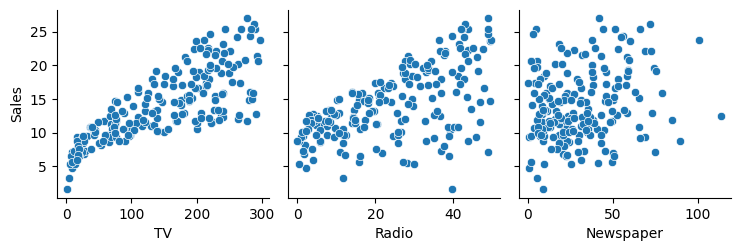

In [17]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

__From the above plot, we can notice that when Advertising cost increase in TV Ads, the sales also increases.__

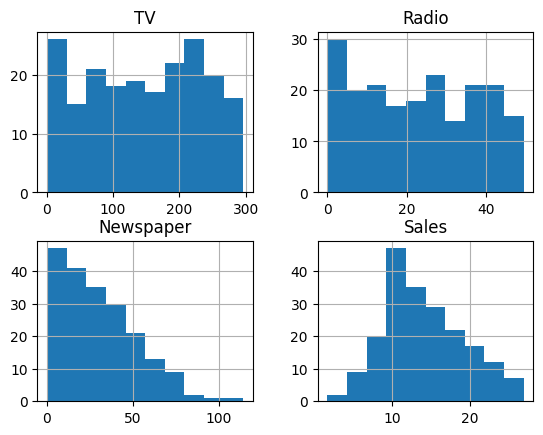

In [18]:
df.hist()
plt.show()

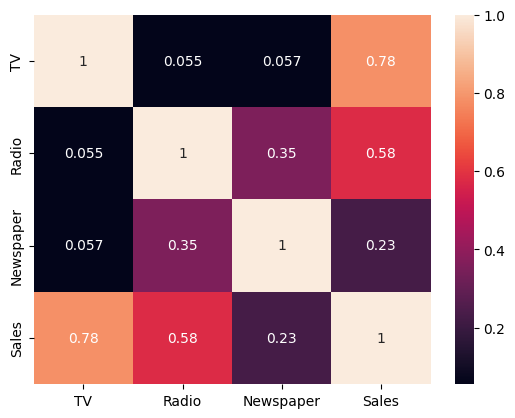

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Train and Test Split:

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training:

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  88.62669447456821


# Model Evaluation:

In [27]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_predictions = model.predict(new_data[['TV', 'Radio', 'Newspaper']])

print("Predicted Sales -->",new_predictions)

Enter the TV value: 199.8
Enter the Radio value: 2.6
Enter the Newspaper value: 21.2
Predicted Sales --> [12.49163597]


In [28]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_predictions = model.predict(new_data[['TV', 'Radio', 'Newspaper']])

print("Predicted Sales -->",new_predictions)

Enter the TV value: 97.5
Enter the Radio value: 7.6
Enter the Newspaper value: 7.2
Predicted Sales --> [8.97324866]


In [29]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))